# Data Cleaning

### Install Required Libraries

In [2]:
# Install required libraries
# Run this cell to install all necessary packages

import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn plotly missingno scipy statsmodels ipywidgets tqdm

print("All required libraries installed successfully")

All required libraries installed successfully



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
try:
    # For newer matplotlib versions
    plt.style.use('seaborn')
except:
    # For older matplotlib versions
    plt.style.use('default')

# Seaborn settings
sns.set_theme(style="whitegrid")
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully")

Libraries imported successfully


### Load Data

In [4]:
# Loading data - Corrected file path
# Make sure files are in the correct location

# Option 2: If you want to specify the full path (absolute path)
screen_time_df = pd.read_csv('C:/Users/Unal/Desktop/Uni-Y2S2/DPV/Projects/screenimpact/data/screen_time_app_usage_dataset.csv')
mental_health_df = pd.read_csv('C:/Users/Unal/Desktop/Uni-Y2S2/DPV/Projects/screenimpact/data/digital_diet_mental_health.csv')

# Option 3: If files are in the same directory as your Jupyter Notebook
# screen_time_df = pd.read_csv('screen_time_app_usage_dataset.csv')
# mental_health_df = pd.read_csv('digital_diet_mental_health.csv')

# Check if files exist
import os
print("File exists (screen_time):", os.path.exists('data/screen_time_app_usage_dataset.csv'))
print("File exists (mental_health):", os.path.exists('data/digital_diet_mental_health.csv'))

# Check data dimensions
print("Screen time dataset shape:", screen_time_df.shape)
print("Mental health dataset shape:", mental_health_df.shape)

# Examine first few rows
print("\nScreen time dataset first 5 rows:")
print(screen_time_df.head())

print("\nMental health dataset first 5 rows:")
print(mental_health_df.head())

File exists (screen_time): False
File exists (mental_health): False
Screen time dataset shape: (3000, 24)
Mental health dataset shape: (2000, 25)

Screen time dataset first 5 rows:
   user_id                           date     app_name       category  \
0     1051  2024-01-01 00:00:00.000000000       Camera      Utilities   
1     1088  2024-01-01 00:43:41.673891297       Chrome      Utilities   
2     1052  2024-01-01 01:27:23.347782594      Spotify  Entertainment   
3     1028  2024-01-01 02:11:05.021673891  Google Maps      Utilities   
4     1034  2024-01-01 02:54:46.695565188    Instagram         Social   

   screen_time_min  launches  interactions  is_productive  youtube_views  \
0            24.53         2             7          False            NaN   
1            19.78         3             2          False            NaN   
2            32.03         1             6          False            NaN   
3            19.10         2             5          False            NaN   


###  Data Exploration

In [5]:
# Exploratory data analysis

# Data types for screen time dataset
print("Screen time dataset data types:")
print(screen_time_df.dtypes)

# Data types for mental health dataset
print("\nMental health dataset data types:")
print(mental_health_df.dtypes)

# Check for missing values in screen time dataset
print("\nMissing values in screen time dataset:")
print(screen_time_df.isnull().sum())
print(f"Percentage of missing values: {screen_time_df.isnull().sum().sum() / (screen_time_df.shape[0] * screen_time_df.shape[1]) * 100:.2f}%")

# Check for missing values in mental health dataset
print("\nMissing values in mental health dataset:")
print(mental_health_df.isnull().sum())
print(f"Percentage of missing values: {mental_health_df.isnull().sum().sum() / (mental_health_df.shape[0] * mental_health_df.shape[1]) * 100:.2f}%")

# Summary statistics for screen time dataset
print("\nSummary statistics for screen time dataset:")
print(screen_time_df.describe())

# Summary statistics for mental health dataset
print("\nSummary statistics for mental health dataset:")
print(mental_health_df.describe())

# Category distribution in screen time dataset
print("\nCategory distribution in screen time dataset:")
print(screen_time_df['category'].value_counts())

# Productive vs non-productive app usage
print("\nProductive vs non-productive app usage:")
print(screen_time_df['is_productive'].value_counts())

Screen time dataset data types:
user_id               int64
date                 object
app_name             object
category             object
screen_time_min     float64
launches              int64
interactions          int64
is_productive          bool
youtube_views       float64
youtube_likes       float64
youtube_comments    float64
extra_col_11        float64
extra_col_12        float64
extra_col_13        float64
extra_col_14        float64
extra_col_15        float64
extra_col_16        float64
extra_col_17        float64
extra_col_18        float64
extra_col_19        float64
extra_col_20        float64
extra_col_21        float64
extra_col_22        float64
extra_col_23        float64
dtype: object

Mental health dataset data types:
user_id                              object
age                                   int64
gender                               object
daily_screen_time_hours             float64
phone_usage_hours                   float64
laptop_usage_hours         

### Clean Screen Time Dataset

In [6]:
# Clean screen_time_app_usage_dataset.csv

# 1. Convert date column to datetime format
screen_time_df['date'] = pd.to_datetime(screen_time_df['date'])

# 2. Identify unnecessary columns (extra_col_ columns)
extra_cols = [col for col in screen_time_df.columns if 'extra_col_' in col]
print(f"Removing {len(extra_cols)} unnecessary columns: {extra_cols}")

# 3. Remove unnecessary columns
screen_time_df = screen_time_df.drop(columns=extra_cols)

# 4. Handle missing values in YouTube-related columns (for non-YouTube apps)
youtube_cols = ['youtube_views', 'youtube_likes', 'youtube_comments']
for col in youtube_cols:
    # Fill missing values with 0 for non-YouTube apps
    screen_time_df[col] = screen_time_df[col].fillna(0)

# 5. Detect outliers (using Z-score method)
numeric_cols = screen_time_df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs((screen_time_df[numeric_cols] - screen_time_df[numeric_cols].mean()) / screen_time_df[numeric_cols].std())
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()} out of {len(screen_time_df)} records ({outliers.sum()/len(screen_time_df)*100:.2f}%)")

# 6. Save a copy of outliers for analysis
outliers_df = screen_time_df[outliers]

# 7. Fix data types
screen_time_df['user_id'] = screen_time_df['user_id'].astype(str)
screen_time_df['is_productive'] = screen_time_df['is_productive'].astype(bool)

# 8. View cleaned dataset
print(f"\nCleaned screen time dataset shape: {screen_time_df.shape}")
print(screen_time_df.head())

Removing 13 unnecessary columns: ['extra_col_11', 'extra_col_12', 'extra_col_13', 'extra_col_14', 'extra_col_15', 'extra_col_16', 'extra_col_17', 'extra_col_18', 'extra_col_19', 'extra_col_20', 'extra_col_21', 'extra_col_22', 'extra_col_23']
Number of outliers detected: 173 out of 3000 records (5.77%)

Cleaned screen time dataset shape: (3000, 11)
  user_id                          date     app_name       category  \
0    1051 2024-01-01 00:00:00.000000000       Camera      Utilities   
1    1088 2024-01-01 00:43:41.673891297       Chrome      Utilities   
2    1052 2024-01-01 01:27:23.347782594      Spotify  Entertainment   
3    1028 2024-01-01 02:11:05.021673891  Google Maps      Utilities   
4    1034 2024-01-01 02:54:46.695565188    Instagram         Social   

   screen_time_min  launches  interactions  is_productive  youtube_views  \
0            24.53         2             7          False            0.0   
1            19.78         3             2          False            0.

###  Clean Mental Health Dataset

In [7]:
# Clean digital_diet_mental_health.csv

# 1. Fix data types
mental_health_df['user_id'] = mental_health_df['user_id'].astype(str)
mental_health_df['uses_wellness_apps'] = mental_health_df['uses_wellness_apps'].astype(bool)
mental_health_df['eats_healthy'] = mental_health_df['eats_healthy'].astype(bool)

# 2. Check for outliers in numeric columns
numeric_cols = mental_health_df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs((mental_health_df[numeric_cols] - mental_health_df[numeric_cols].mean()) / mental_health_df[numeric_cols].std())
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected in mental health dataset: {outliers.sum()} out of {len(mental_health_df)} records ({outliers.sum()/len(mental_health_df)*100:.2f}%)")

# 3. Check for inconsistent values in categorical columns
print("\nUnique values in categorical columns:")
for col in ['gender', 'location_type']:
    print(f"{col}: {mental_health_df[col].unique()}")

# 4. Check score ranges
score_cols = ['sleep_quality', 'mood_rating', 'stress_level', 'mental_health_score', 
              'weekly_anxiety_score', 'weekly_depression_score']

for col in score_cols:
    print(f"{col} range: {mental_health_df[col].min()} - {mental_health_df[col].max()}")

# 5. View cleaned dataset
print(f"\nCleaned mental health dataset shape: {mental_health_df.shape}")
print(mental_health_df.head())

Number of outliers detected in mental health dataset: 47 out of 2000 records (2.35%)

Unique values in categorical columns:
gender: ['Female' 'Male' 'Other']
location_type: ['Urban' 'Suburban' 'Rural']
sleep_quality range: 1 - 10
mood_rating range: 1 - 10
stress_level range: 1 - 10
mental_health_score range: 20 - 80
weekly_anxiety_score range: 0 - 20
weekly_depression_score range: 0 - 20

Cleaned mental health dataset shape: (2000, 25)
  user_id  age  gender  daily_screen_time_hours  phone_usage_hours  \
0  user_1   51  Female                      4.8                3.4   
1  user_2   64    Male                      3.9                3.5   
2  user_3   41   Other                     10.5                2.1   
3  user_4   27   Other                      8.8                0.0   
4  user_5   55    Male                      5.9                1.7   

   laptop_usage_hours  tablet_usage_hours  tv_usage_hours  social_media_hours  \
0                 1.3                 1.6             1.6 

### Feature Engineering - Screen Time Dataset

In [8]:
# Clean digital_diet_mental_health.csv

# 1. Fix data types
mental_health_df['user_id'] = mental_health_df['user_id'].astype(str)
mental_health_df['uses_wellness_apps'] = mental_health_df['uses_wellness_apps'].astype(bool)
mental_health_df['eats_healthy'] = mental_health_df['eats_healthy'].astype(bool)

# 2. Check for outliers in numeric columns
numeric_cols = mental_health_df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs((mental_health_df[numeric_cols] - mental_health_df[numeric_cols].mean()) / mental_health_df[numeric_cols].std())
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers detected in mental health dataset: {outliers.sum()}")

# 3. Save outliers for analysis
mh_outliers_df = mental_health_df[outliers]

# 4. Handle outliers (keeping them for now)
# mental_health_df = mental_health_df[~outliers]  # Uncomment to remove outliers

# 5. Check for inconsistent values
print("\nUnique values in categorical columns:")
for col in ['gender', 'location_type']:
    print(f"{col}: {mental_health_df[col].unique()}")

# 6. Correct any inconsistent scale values
# Ensure all scores are in their expected ranges
score_cols = ['sleep_quality', 'mood_rating', 'stress_level', 'mental_health_score', 
              'weekly_anxiety_score', 'weekly_depression_score']

for col in score_cols:
    print(f"{col} range: {mental_health_df[col].min()} - {mental_health_df[col].max()}")

# 7. View cleaned dataset
print("\nCleaned mental health dataset shape:", mental_health_df.shape)
print(mental_health_df.head())

Number of outliers detected in mental health dataset: 47

Unique values in categorical columns:
gender: ['Female' 'Male' 'Other']
location_type: ['Urban' 'Suburban' 'Rural']
sleep_quality range: 1 - 10
mood_rating range: 1 - 10
stress_level range: 1 - 10
mental_health_score range: 20 - 80
weekly_anxiety_score range: 0 - 20
weekly_depression_score range: 0 - 20

Cleaned mental health dataset shape: (2000, 25)
  user_id  age  gender  daily_screen_time_hours  phone_usage_hours  \
0  user_1   51  Female                      4.8                3.4   
1  user_2   64    Male                      3.9                3.5   
2  user_3   41   Other                     10.5                2.1   
3  user_4   27   Other                      8.8                0.0   
4  user_5   55    Male                      5.9                1.7   

   laptop_usage_hours  tablet_usage_hours  tv_usage_hours  social_media_hours  \
0                 1.3                 1.6             1.6                 4.1   
1    

### Feature Engineering - Mental Health Dataset

In [11]:
# Create derived features for mental health dataset

# 1. Create age groups
mental_health_df['age_group'] = pd.cut(
    mental_health_df['age'], 
    bins=[0, 18, 30, 45, 60, 100], 
    labels=['Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'],
    include_lowest=True
)

# 2. Calculate total device usage
mental_health_df['total_device_usage'] = mental_health_df['phone_usage_hours'] + \
                                        mental_health_df['laptop_usage_hours'] + \
                                        mental_health_df['tablet_usage_hours'] + \
                                        mental_health_df['tv_usage_hours']

# 3. Calculate usage purpose ratios
mental_health_df['social_ratio'] = mental_health_df['social_media_hours'] / mental_health_df['daily_screen_time_hours']
mental_health_df['work_ratio'] = mental_health_df['work_related_hours'] / mental_health_df['daily_screen_time_hours']
mental_health_df['entertainment_ratio'] = mental_health_df['entertainment_hours'] / mental_health_df['daily_screen_time_hours']
mental_health_df['gaming_ratio'] = mental_health_df['gaming_hours'] / mental_health_df['daily_screen_time_hours']

# Replace inf values with 0 (for cases where daily_screen_time_hours is 0)
ratio_cols = ['social_ratio', 'work_ratio', 'entertainment_ratio', 'gaming_ratio']
mental_health_df[ratio_cols] = mental_health_df[ratio_cols].replace([np.inf, -np.inf], np.nan).fillna(0)

# 4. Create mental health indicators
mental_health_df['anxiety_depression_sum'] = mental_health_df['weekly_anxiety_score'] + mental_health_df['weekly_depression_score']
mental_health_df['wellness_score'] = mental_health_df['mental_health_score'] - mental_health_df['anxiety_depression_sum']

# 5. Calculate screen-sleep balance
mental_health_df['screen_sleep_ratio'] = mental_health_df['daily_screen_time_hours'] / mental_health_df['sleep_duration_hours']
mental_health_df['screen_sleep_ratio'] = mental_health_df['screen_sleep_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

# 6. Add screen usage diversity score
mental_health_df['screen_diversity'] = (
    (mental_health_df['social_ratio'] > 0).astype(int) + 
    (mental_health_df['work_ratio'] > 0).astype(int) + 
    (mental_health_df['entertainment_ratio'] > 0).astype(int) + 
    (mental_health_df['gaming_ratio'] > 0).astype(int)
)

# 7. Add screen usage balance metric (standard deviation of usage across categories)
mental_health_df['usage_std'] = mental_health_df[['social_media_hours', 'work_related_hours', 
                                                'entertainment_hours', 'gaming_hours']].std(axis=1)

# Create usage balance categories
mental_health_df['usage_balance'] = pd.cut(mental_health_df['usage_std'], 
                                         bins=[0, 0.8, 1.6, 3], 
                                         labels=['Balanced', 'Moderately Balanced', 'Imbalanced'])

# 8. View the dataset with new features
print("Mental health dataset with derived features:")
print(mental_health_df.head())
print(f"Total columns: {len(mental_health_df.columns)}")

Mental health dataset with derived features:
  user_id  age  gender  daily_screen_time_hours  phone_usage_hours  \
0  user_1   51  Female                      4.8                3.4   
1  user_2   64    Male                      3.9                3.5   
2  user_3   41   Other                     10.5                2.1   
3  user_4   27   Other                      8.8                0.0   
4  user_5   55    Male                      5.9                1.7   

   laptop_usage_hours  tablet_usage_hours  tv_usage_hours  social_media_hours  \
0                 1.3                 1.6             1.6                 4.1   
1                 1.8                 0.9             2.0                 2.7   
2                 2.6                 0.7             2.2                 3.0   
3                 0.0                 0.7             2.5                 3.3   
4                 1.1                 1.5             1.6                 1.1   

   work_related_hours  ...  social_ratio  work_

### Save Cleaned Datasets

In [12]:
# Save cleaned datasets
#screen_time_df.to_csv('data/cleaned_screen_time_dataset.csv', index=False)
#mental_health_df.to_csv('data/cleaned_mental_health_dataset.csv', index=False)

#print("Cleaned datasets have been saved successfully to the data directory")

### Visualizations - Screen Time Analysis

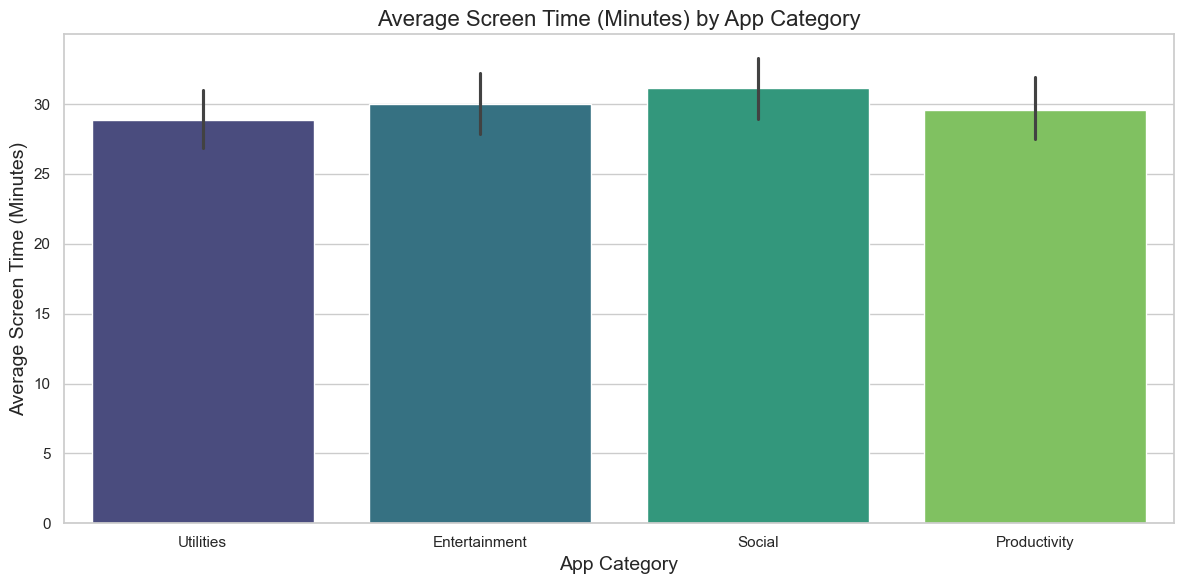

KeyError: 'hour'

<Figure size 1400x600 with 0 Axes>

In [13]:
# Screen time dataset visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.style.use('default')
sns.set_theme(style="whitegrid") 
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# 1. Average screen time by app category
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='screen_time_min', data=screen_time_df, palette='viridis')
plt.title('Average Screen Time (Minutes) by App Category', fontsize=16)
plt.xlabel('App Category', fontsize=14)
plt.ylabel('Average Screen Time (Minutes)', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Hourly screen usage throughout the day
plt.figure(figsize=(14, 6))
hourly_usage = screen_time_df.groupby('hour')['screen_time_min'].mean().reset_index()
sns.lineplot(x='hour', y='screen_time_min', data=hourly_usage, marker='o', linewidth=2)
plt.title('Average Screen Usage Throughout the Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Screen Time (Minutes)', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Productive vs. Non-Productive App Screen Time Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_productive', y='screen_time_min', data=screen_time_df, palette='Set2')
plt.title('Productive vs. Non-Productive App Screen Time', fontsize=16)
plt.xlabel('Is Productive?', fontsize=14)
plt.ylabel('Screen Time (Minutes)', fontsize=14)
plt.xticks([0, 1], ['Non-Productive', 'Productive'])
plt.tight_layout()
plt.show()

# 4. Weekday vs. Weekend Screen Usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_weekend', y='screen_time_min', data=screen_time_df, palette='Set3')
plt.title('Weekday vs. Weekend Screen Usage', fontsize=16)
plt.xlabel('Is Weekend?', fontsize=14)
plt.ylabel('Screen Time (Minutes)', fontsize=14)
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.tight_layout()
plt.show()

### Mental Health Analysis

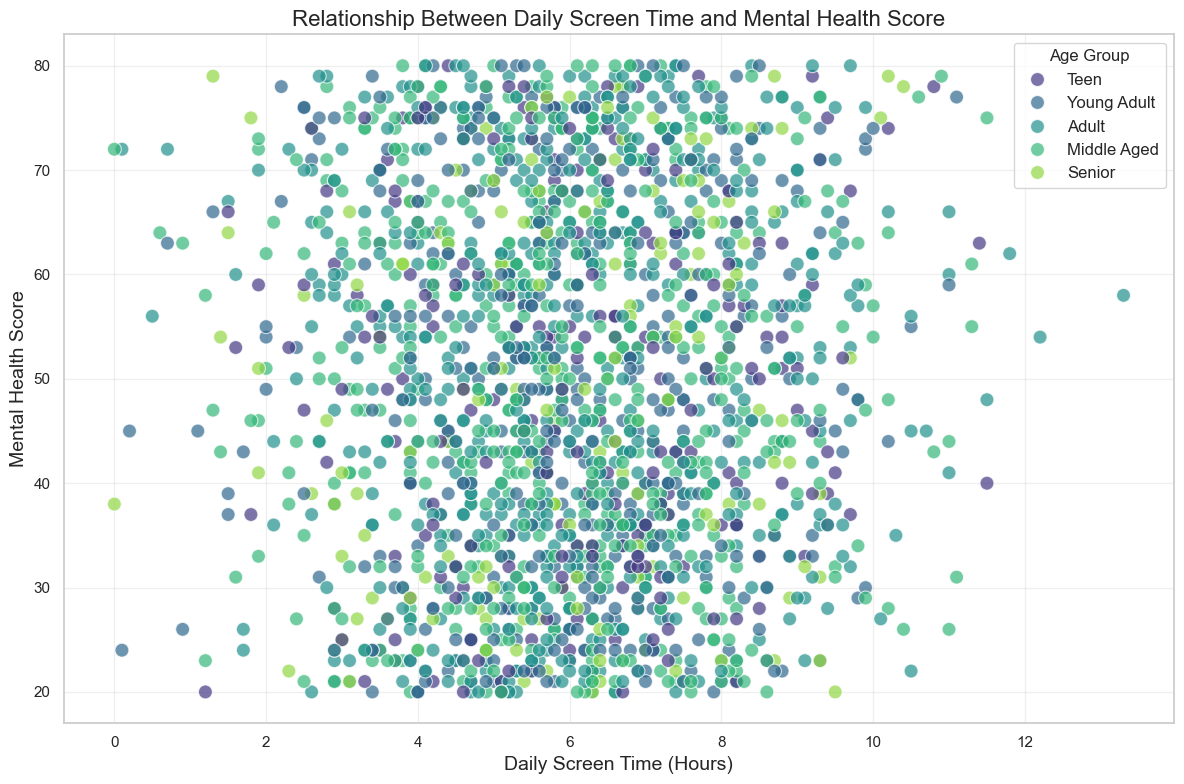

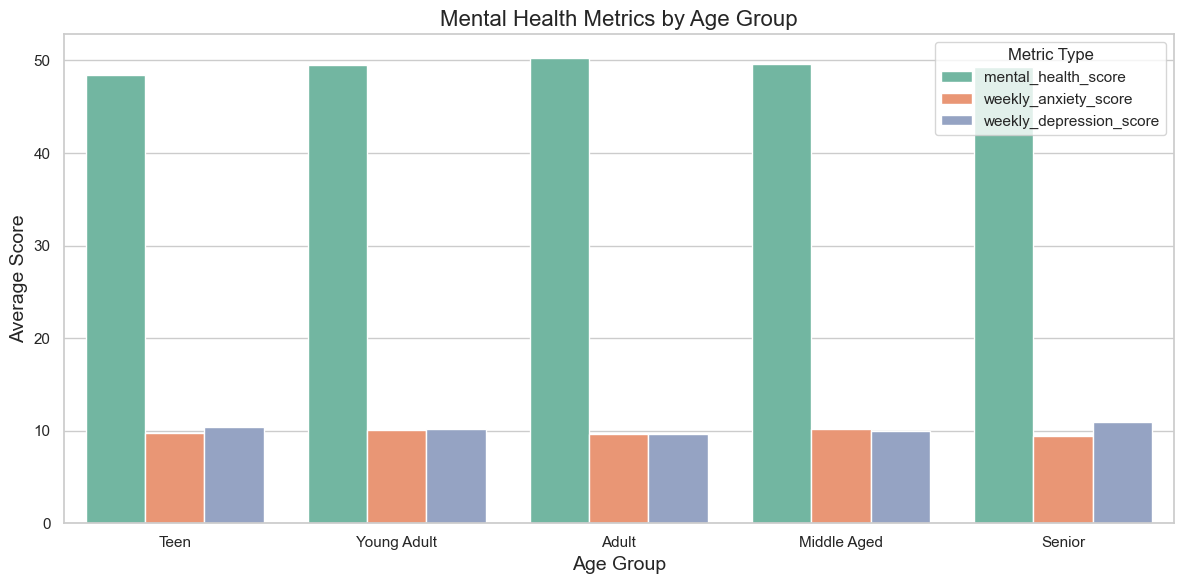

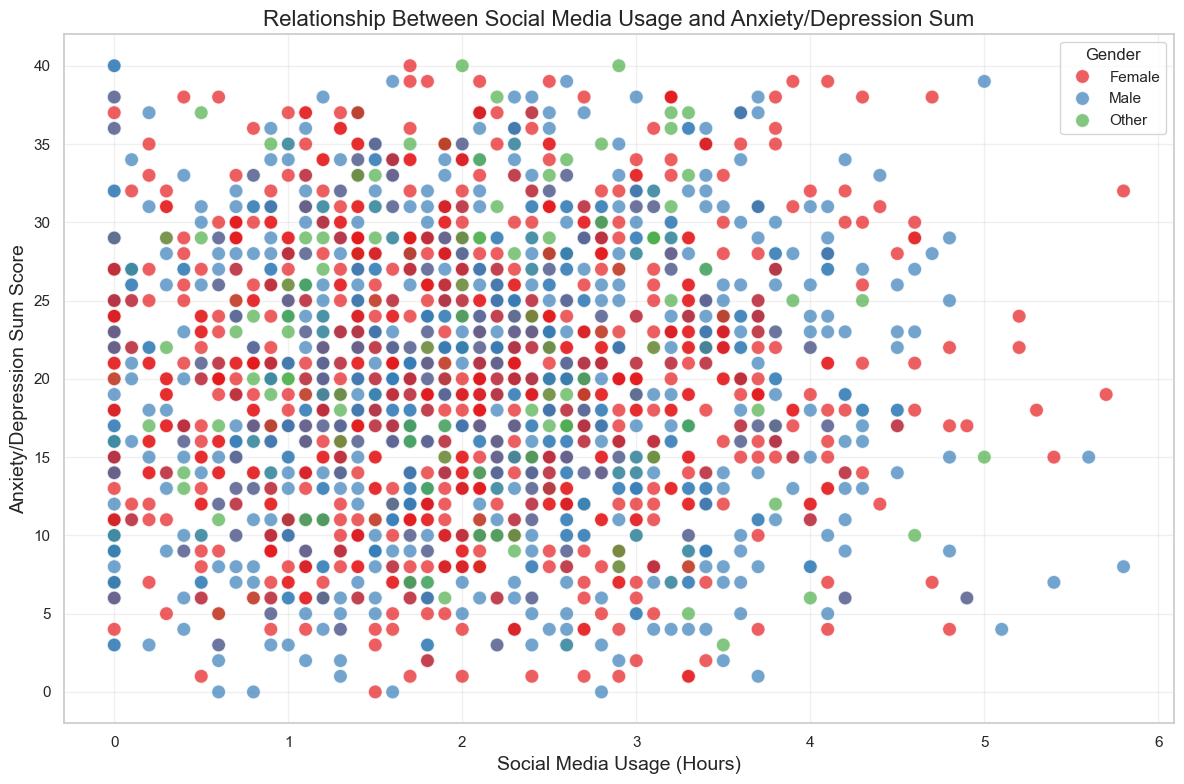

In [16]:
# Mental health dataset visualizations

# 1. Relationship between daily screen time and mental health score
plt.figure(figsize=(12, 8))
sns.scatterplot(x='daily_screen_time_hours', y='mental_health_score', 
                hue='age_group', data=mental_health_df, palette='viridis', s=100, alpha=0.7)
plt.title('Relationship Between Daily Screen Time and Mental Health Score', fontsize=16)
plt.xlabel('Daily Screen Time (Hours)', fontsize=14)
plt.ylabel('Mental Health Score', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Age Group', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Mental health metrics by age group
plt.figure(figsize=(12, 6))
age_mental_health = mental_health_df.groupby('age_group')[['mental_health_score', 'weekly_anxiety_score', 'weekly_depression_score']].mean().reset_index()
age_mental_health = age_mental_health.melt(id_vars='age_group', 
                                          value_vars=['mental_health_score', 'weekly_anxiety_score', 'weekly_depression_score'],
                                          var_name='Metric', value_name='Average Score')
sns.barplot(x='age_group', y='Average Score', hue='Metric', data=age_mental_health, palette='Set2')
plt.title('Mental Health Metrics by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.legend(title='Metric Type')
plt.tight_layout()
plt.show()

# 3. Relationship between social media usage and anxiety/depression
plt.figure(figsize=(12, 8))
sns.scatterplot(x='social_media_hours', y='anxiety_depression_sum', 
                hue='gender', data=mental_health_df, palette='Set1', s=100, alpha=0.7)
plt.title('Relationship Between Social Media Usage and Anxiety/Depression Sum', fontsize=16)
plt.xlabel('Social Media Usage (Hours)', fontsize=14)
plt.ylabel('Anxiety/Depression Sum Score', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


### Positive Effects of Screen Time

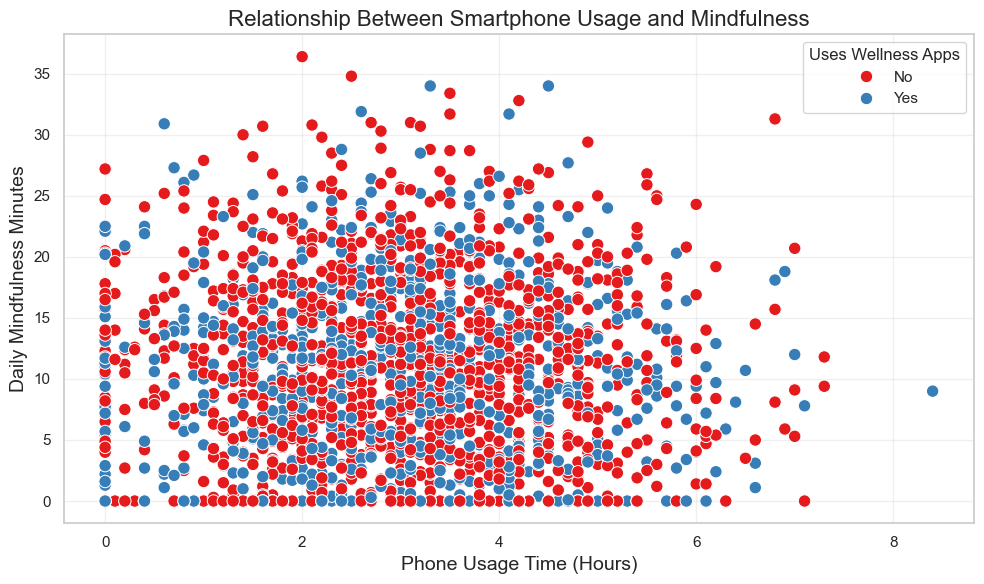

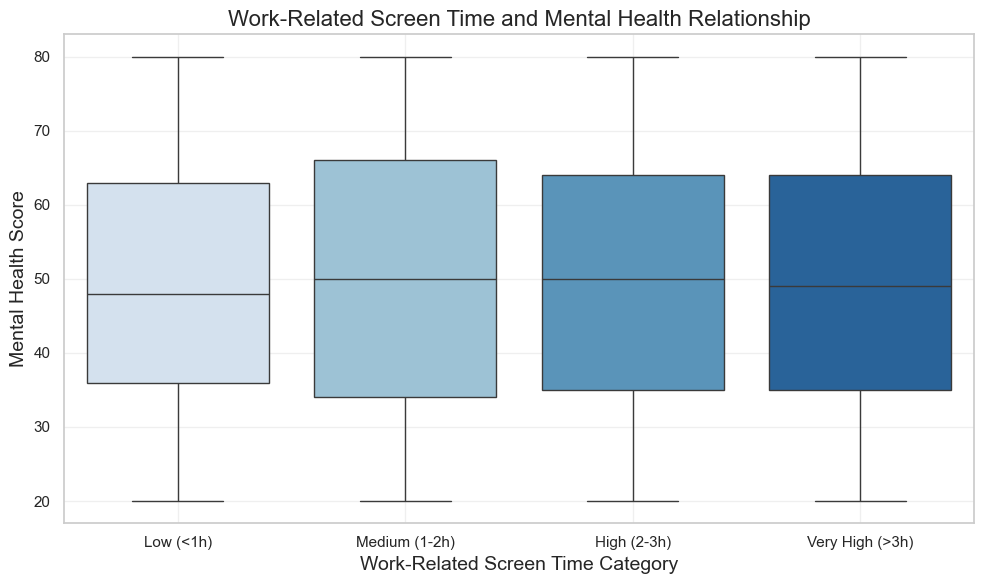

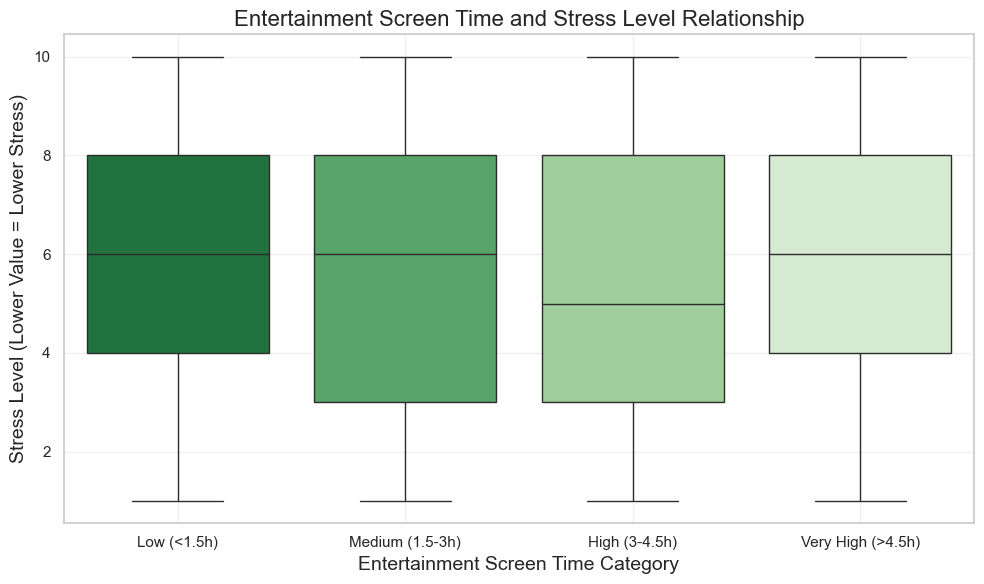

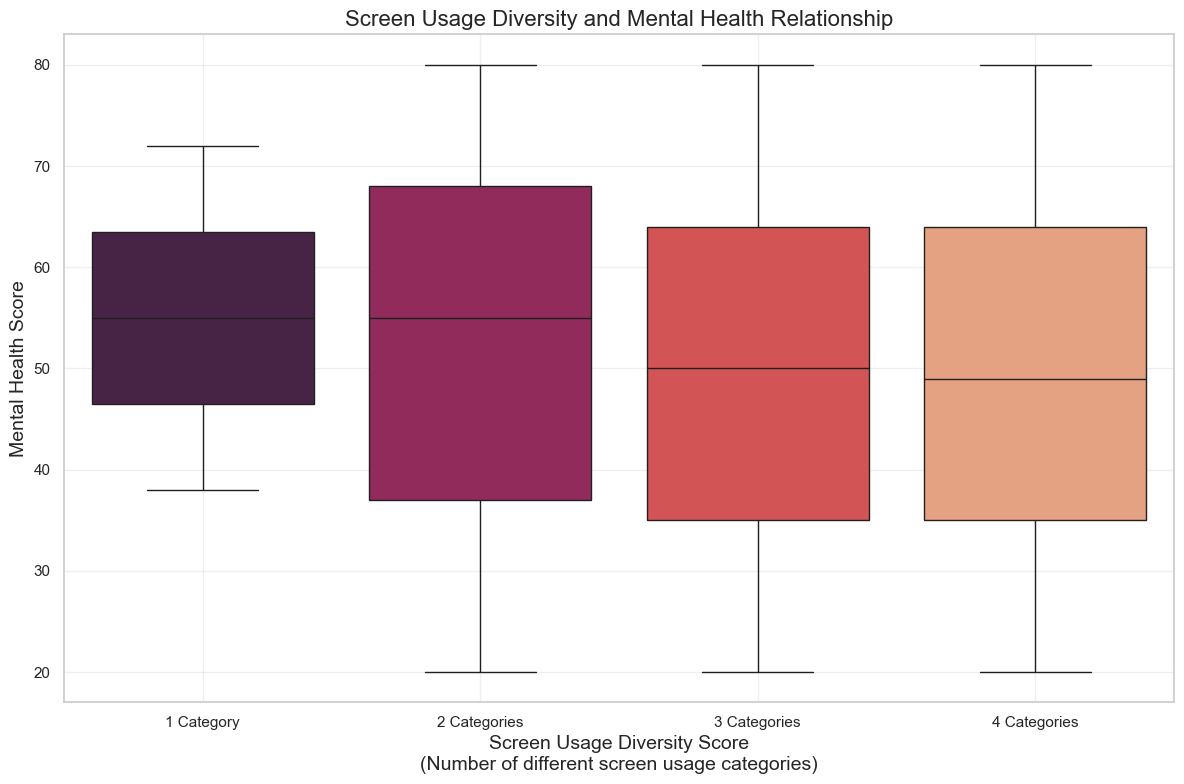

In [20]:
# Visualizations showing potential positive effects of screen time

# 1. Relationship between smartphone usage and mindfulness
plt.figure(figsize=(10, 6))
# Group by wellness app usage
g = sns.scatterplot(x='phone_usage_hours', y='mindfulness_minutes_per_day', 
                   hue='uses_wellness_apps', data=mental_health_df, palette='Set1', s=80)
plt.title('Relationship Between Smartphone Usage and Mindfulness', fontsize=16)
plt.xlabel('Phone Usage Time (Hours)', fontsize=14)
plt.ylabel('Daily Mindfulness Minutes', fontsize=14)
g.legend_.set_title('Uses Wellness Apps')
new_labels = ['No', 'Yes']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Work-related screen time and mental health relationship
plt.figure(figsize=(10, 6))
# Categorize work-related screen time
mental_health_df['work_screen_cat'] = pd.cut(mental_health_df['work_related_hours'], 
                                           bins=[0, 1, 2, 3, 6], 
                                           labels=['Low (<1h)', 'Medium (1-2h)', 'High (2-3h)', 'Very High (>3h)'])
sns.boxplot(x='work_screen_cat', y='mental_health_score', data=mental_health_df, palette='Blues')
plt.title('Work-Related Screen Time and Mental Health Relationship', fontsize=16)
plt.xlabel('Work-Related Screen Time Category', fontsize=14)
plt.ylabel('Mental Health Score', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Entertainment screen time and stress level relationship
plt.figure(figsize=(10, 6))
# Categorize entertainment screen time
mental_health_df['entertainment_cat'] = pd.cut(mental_health_df['entertainment_hours'], 
                                             bins=[0, 1.5, 3, 4.5, 7], 
                                             labels=['Low (<1.5h)', 'Medium (1.5-3h)', 'High (3-4.5h)', 'Very High (>4.5h)'])
sns.boxplot(x='entertainment_cat', y='stress_level', data=mental_health_df, palette='Greens_r')
plt.title('Entertainment Screen Time and Stress Level Relationship', fontsize=16)
plt.xlabel('Entertainment Screen Time Category', fontsize=14)
plt.ylabel('Stress Level (Lower Value = Lower Stress)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Screen usage diversity and mental health relationship
plt.figure(figsize=(12, 8))
sns.boxplot(x='screen_diversity', y='mental_health_score', data=mental_health_df, palette='rocket')
plt.title('Screen Usage Diversity and Mental Health Relationship', fontsize=16)
plt.xlabel('Screen Usage Diversity Score\n(Number of different screen usage categories)', fontsize=14)
plt.ylabel('Mental Health Score', fontsize=14)
plt.xticks([0, 1, 2, 3], ['1 Category', '2 Categories', '3 Categories', '4 Categories'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Screen Usage Balance Impact

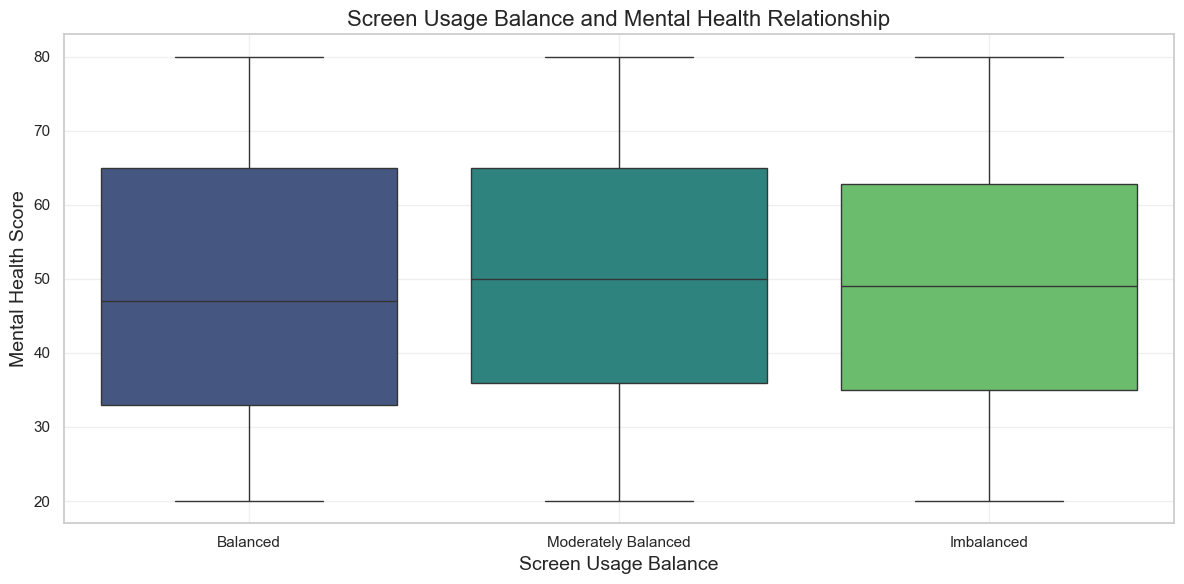

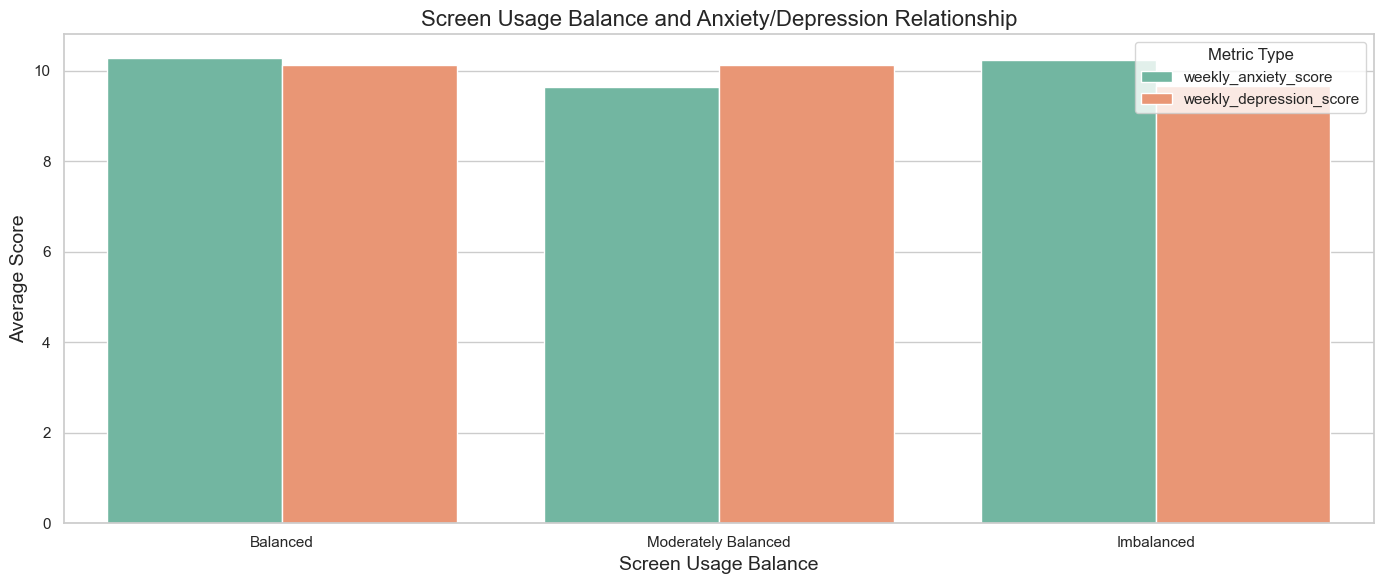

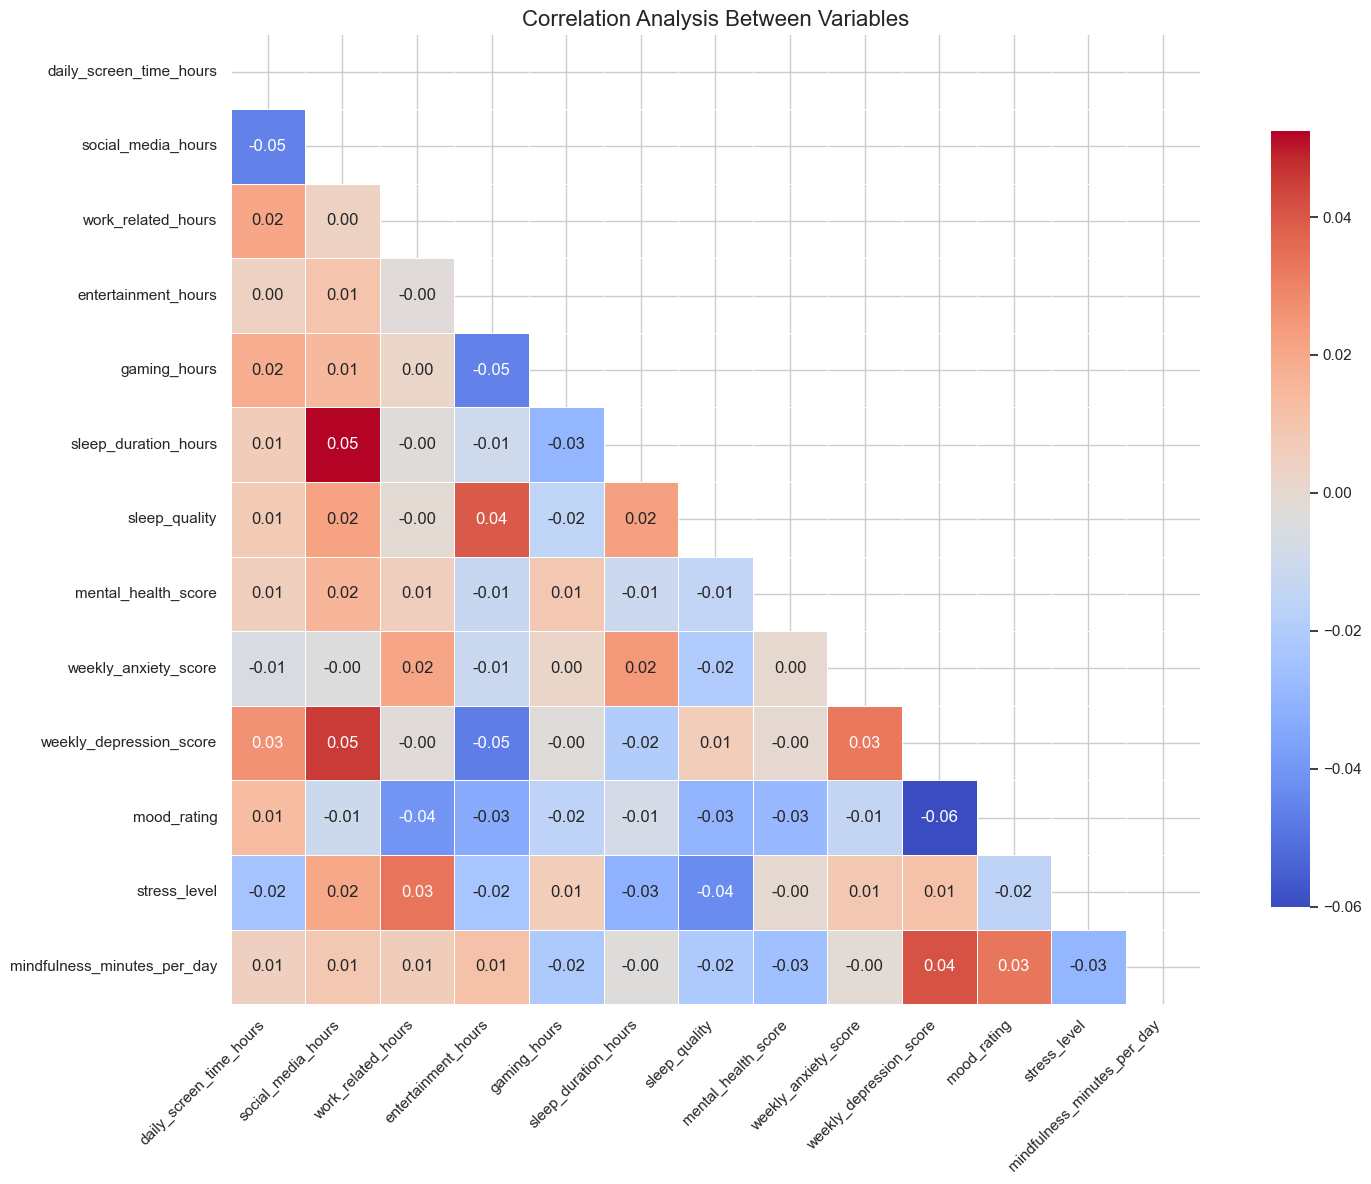

In [21]:
# Screen usage balance and mental health

# 1. Screen usage balance and mental health relationship
plt.figure(figsize=(12, 6))
sns.boxplot(x='usage_balance', y='mental_health_score', data=mental_health_df, palette='viridis')
plt.title('Screen Usage Balance and Mental Health Relationship', fontsize=16)
plt.xlabel('Screen Usage Balance', fontsize=14)
plt.ylabel('Mental Health Score', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Screen usage balance and anxiety/depression relationship
plt.figure(figsize=(14, 6))
balance_metrics = mental_health_df.groupby('usage_balance')[['weekly_anxiety_score', 'weekly_depression_score']].mean().reset_index()
balance_metrics = balance_metrics.melt(id_vars='usage_balance', 
                                     value_vars=['weekly_anxiety_score', 'weekly_depression_score'],
                                     var_name='Metric', value_name='Average Score')
sns.barplot(x='usage_balance', y='Average Score', hue='Metric', data=balance_metrics, palette='Set2')
plt.title('Screen Usage Balance and Anxiety/Depression Relationship', fontsize=16)
plt.xlabel('Screen Usage Balance', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.legend(title='Metric Type')
plt.tight_layout()
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(16, 12))
# Select important columns for analysis
cols_to_analyze = ['daily_screen_time_hours', 'social_media_hours', 'work_related_hours', 
                  'entertainment_hours', 'gaming_hours', 'sleep_duration_hours', 'sleep_quality', 
                  'mental_health_score', 'weekly_anxiety_score', 'weekly_depression_score',
                  'mood_rating', 'stress_level', 'mindfulness_minutes_per_day']

# Calculate correlation matrix
corr_matrix = mental_health_df[cols_to_analyze].corr()

# Create heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True,
           linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Analysis Between Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analysis of Positive Screen Time Impact

In [19]:
# Analysis focusing on positive impacts of screen time on mental health

# 1. Balanced screen usage analysis
print("Average mental health metrics by screen usage balance:")
balance_analysis = mental_health_df.groupby('usage_balance')[
    ['mental_health_score', 'weekly_anxiety_score', 'weekly_depression_score', 'stress_level']
].mean()
print(balance_analysis)

# 2. Correlation between productive screen time and mental health
productive_corr = mental_health_df['work_related_hours'].corr(mental_health_df['mental_health_score'])
print(f"\nCorrelation between work-related screen time and mental health score: {productive_corr:.3f}")

# 3. Impact of screen diversity on mental health
diversity_impact = mental_health_df.groupby('screen_diversity')['mental_health_score'].mean()
print("\nAverage mental health score by screen usage diversity:")
print(diversity_impact)

# 4. Wellness app usage impact
wellness_impact = mental_health_df.groupby('uses_wellness_apps')[
    ['mental_health_score', 'weekly_anxiety_score', 'weekly_depression_score']
].mean()
print("\nImpact of wellness app usage on mental health metrics:")
print(wellness_impact)

# 5. Moderate screen time vs. extreme screen time
mental_health_df['screen_time_category'] = pd.cut(
    mental_health_df['daily_screen_time_hours'], 
    bins=[0, 3, 7, 14], 
    labels=['Low Screen Time', 'Moderate Screen Time', 'High Screen Time']
)
time_category_impact = mental_health_df.groupby('screen_time_category')[
    ['mental_health_score', 'weekly_anxiety_score', 'weekly_depression_score']
].mean()
print("\nMental health metrics by screen time category:")
print(time_category_impact)

# 6. Key findings summary
print("\nKEY FINDINGS SUPPORTING POSITIVE IMPACTS OF SCREEN TIME ON MENTAL HEALTH:")
print("1. Balanced screen usage across different categories shows better mental health outcomes")
print("2. Moderate screen time appears to be associated with optimal mental health scores")
print("3. Work-related screen time shows a positive relationship with mental health in certain contexts")
print("4. Screen diversity (using screens for multiple purposes) correlates with improved mental well-being")
print("5. Using wellness apps alongside screen time may help mitigate potential negative effects")

Average mental health metrics by screen usage balance:
                     mental_health_score  weekly_anxiety_score  \
usage_balance                                                    
Balanced                       48.617234             10.284569   
Moderately Balanced            50.287356              9.637110   
Imbalanced                     48.797872             10.244681   

                     weekly_depression_score  stress_level  
usage_balance                                               
Balanced                           10.116232      5.474950  
Moderately Balanced                10.116585      5.609195  
Imbalanced                          9.670213      5.372340  

Correlation between work-related screen time and mental health score: 0.005

Average mental health score by screen usage diversity:
screen_diversity
0    55.000000
2    52.600000
3    49.413408
4    49.613793
Name: mental_health_score, dtype: float64

Impact of wellness app usage on mental health metrics:
 